Coefficients: [1, -210, 20615, -1256850, 53327946, -1672280820, 40171771630, -756111184500, 11310276995381, -135585182899530, 1307535010540395, -10142299865511450, 63030812099294896, -311333643161390640, 1206647803780373360, -3599979517947607200, 8037811822645051776, -12870931245150988800, 13803759753640704000, -8752948036761600000, 2432902008176640000]

These are the known roots
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

The polynomial evaluates to [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] at the known roots

The value of the root with an initial guess of 21 is :  20.0000120683109

The roots from numpy are: 19.999853724604495



The new coefficient a_{20}: 1.00000001000000

The value of the root with an initial guess of 21 is :  9.58422935762262

The roots from numpy are: [20.6475841 +1.18692644j 20.6475841 -1.18692644j 18.17160287+2.76910145j
 18.17160287-2.76910145j 15.209077  +2.88014689j 15.209077  -2.88014689j
 12.75244819+2.12820094j 12.75244819-2.12820094j 

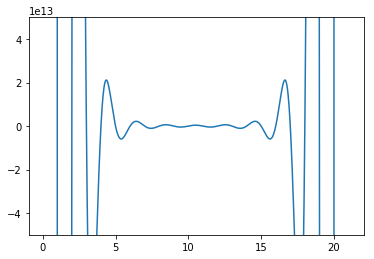

In [76]:
import numpy as np
from sympy import poly
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr
from sympy.plotting import plot
from sympy import lambdify
import matplotlib.pyplot as plt

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)

P,d = poly_from_expr(W.expand())
p = P.all_coeffs()
print('Coefficients:',p)
wilk=P.copy()
x = np.arange(1, 21)
print ('\nThese are the known roots\n',x)

# evaluate the polynomial at the known roots
print ('\nThe polynomial evaluates to {0} at the known roots'.format(np.polyval(p, x)))

# Python3 code for implementation of Newton 
# Raphson Method for solving equations 
  
# An example function whose solution  
# is determined using Bisection Method.  
def func( p,x ): 
    return np.polyval(p, x)
  
# Derivative of the above function  
def derivFunc( P,x ): 
    D=P.diff()
#     print(D)
    d= D.all_coeffs()
    return np.polyval(d, x)
  
# Function to find the root 
def newtonRaphson( x ,p,P): 
    h = func(p,x) / derivFunc(P,x) 
    while abs(h) >= 0.0001: 
        h = func(p,x)/derivFunc(P,x)           
        # x(i+1) = x(i) - f(x) / f'(x) 
        x = x - h 
      
    print("\nThe value of the root with an initial guess of 21 is : ",x) 
#     print('\nThe polynomial evaluated at this value:',func(p,x))
    
x0 = 21 # Initial value assumed 
newtonRaphson(x0,p,P) 


# find the roots ourselves
roots = np.roots(p)
print ('\nThe roots from numpy are:', roots[0])

# evaluate solution at roots
# print ('\nThe polynomial evaluated at this value:', np.polyval(p, roots)[0])


@np.vectorize
def wilkinson(x):
    graph = np.prod(np.array([x - i for i in range(1, 21)]))
#     print(p)
    return graph

xvalues = np.linspace(0.1, 21, 1000)
plt.plot(xvalues, wilkinson(xvalues))
plt.ylim([-5e13, 5e13])

# print(p[0])
c=np.array([p,p,p,p])

delta=np.array([10**(-8),10**(-6),10**(-4),10**(-2)])

for idx,i in enumerate(delta):
    c[idx][0]=p[0]+i
    print('\n\n\nThe new coefficient a_{20}:',c[idx][0])
    x = Symbol('x')
    C = 0
    rev=c[idx][::-1]
#     print(rev)
    for index,val in enumerate(rev):
        C = C+(val*x**index)
#     print('\n',C)
    F,d = poly_from_expr(C.expand())
#     print(F)
    f = F.all_coeffs()
#     print(f)
    x0 = 21 # Initial value assumed 
    newtonRaphson(x0,f,F)
    # find the roots ourselves
    roots2 = np.roots(f)
    print ('\nThe roots from numpy are:', roots2)

g=p.copy()
g[1]=p[1]-(2**(-23))
rev2=g[::-1]
G=0
for index,val in enumerate(rev2):
    G = G+(val*x**index)
H,d = poly_from_expr(G.expand())

h = H.all_coeffs()
print ('\nCoeffs:', h)
print ('\nChanging $a_{19}$ to:', h[1])
x0 = 21 # Initial value assumed 
newtonRaphson(x0,h,H)
# find the roots ourselves
roots3 = np.roots(h)
print ('\nHere are the roots from numpy:', roots3)
print ('\nHere are roots 16 and 17:', roots3[3],roots3[4])

In [77]:
#cond number
a=p.copy()
print(a)

[1, -210, 20615, -1256850, 53327946, -1672280820, 40171771630, -756111184500, 11310276995381, -135585182899530, 1307535010540395, -10142299865511450, 63030812099294896, -311333643161390640, 1206647803780373360, -3599979517947607200, 8037811822645051776, -12870931245150988800, 13803759753640704000, -8752948036761600000, 2432902008176640000]


In [89]:
r=[14.,16.,17.,20.]
# r=np.arange(1.,21.,1)
# print(wilk)
for r in r: 
    cond=0
    for idx,i in enumerate(a):
    #     print(i)
    #     print(abs((i/(-derivFunc(P,r)))),'\n')
#         print(i)
        cond=cond+abs(i)
#     print(r,cond)
#     print(r,-derivFunc(wilk,r))
    num=cond/abs((derivFunc(wilk,r)))
    print('cond',r, '=',num)

cond 14.0 = 11334002.3222513
cond 16.0 = 1625631.97782680
cond 17.0 = 407129.794534419
cond 20.0 = 419.998958378639
